# Working with a synthetic data set


## Importing Libraries
We are going to use matplotlib and numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Given the data stored in the file as csv (in the simple format: $x_1,x_2,y$), let us load it using loadtxt

In [41]:
filename="train10.txt"
aaa=np.loadtxt(filename, delimiter=',') 
[N,dim]=np.shape(aaa)
print(N,dim)

10 2


Let's plot the data, making sure to label the axes and label the points appropriately (using different color/symbols for point +1 and -1). 
Draw a random line seperating the data.

In [42]:
def Pol(X, k):
    N=np.shape(X)[0]
    Z=np.ones((N, k+1))
    for i in range(k):
        Z[:,i+1]=np.power(X, i+1)
    return Z


[3.13541795e-01 1.87032166e-01 5.88958253e-02 3.68232971e-05
 3.41635819e-03 2.04360120e-02]


Text(0, 0.5, '$Ein$')

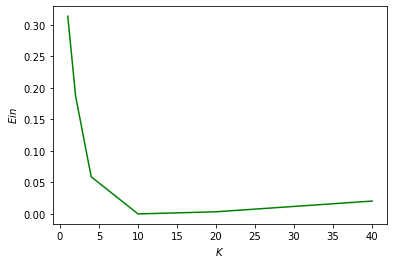

In [43]:
datax=aaa[:,0]
datay=aaa[:,1]
eIn=np.zeros(6)
k=[1,2,4,10,20,40]
LRW = [np.zeros(1),np.zeros(2),np.zeros(4),np.zeros(10),np.zeros(20),np.zeros(40)]


#print(datax);
#print(datay);


for i in range(6):
    X=Pol(datax, k[i])
    #print(X)

    Y=datay
    w_lr=np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),Y)
    LRW[i]=w_lr
    #print(w_lr);


    b=np.dot(X,w_lr)
    
    #print(b)
    #print(Y)
    #print(b-Y)


    eIn[i]=sum((b-Y)**2)/N

print(eIn)
#print(LRW);

fig3=plt.figure()
ax3=plt.axes();

plt.plot(k,eIn,'g')


ax3.set_xlabel("$K$")
ax3.set_ylabel("$Ein$")


### Let's calculate the error using the above line as the classifier.

In [44]:
filename="test10k.txt"
bbb=np.loadtxt(filename, delimiter=',') 
[N2,dim]=np.shape(bbb)
print(N2,dim)

10000 2


## Homework Problem 2
You are given a data file of linearly separable data in $\mathbb{R}^3$.  Plot the data and generate 20 random linear classifiers.  Calculate te error for each of the random classifiers.  What is the best and average error. Submit the plot for the best fit, the weights of the best fit, the best error and the average error.

[4.00321232e-01 1.83186078e-01 2.12347862e-01 9.53160945e+01
 6.97121597e+02 5.26394100e+03]


Text(0, 0.5, '$Eout$')

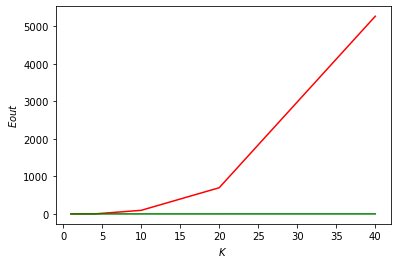

In [45]:
eOut=np.zeros(6)

for i in range(6):  
    testx=bbb[:,0]
    texty=bbb[:,1]
    


    X=Pol(testx, k[i])
    
    Y=texty;
    
    b=np.dot(X,LRW[i])

    eOut[i]=sum((b-Y)**2)/N2


print(eOut)

fig3=plt.figure()
ax3=plt.axes();

plt.plot(k,eOut,'r')
plt.plot(k,eIn,'g')


ax3.set_xlabel("$K$")
ax3.set_ylabel("$Eout$")


### Let's try do do the same thing using matrix notation
The data is given by ddd, an $N \times dim$ matrix.  The first $dim-1$ columns is the input and the last column is the output. Let's create a matrix $X$ for the input (the first column is all ones). 

In [37]:
filename="train40.txt"
ccc=np.loadtxt(filename, delimiter=',') 
[N3,dim]=np.shape(ccc)
print(N3,dim)

40 2


[1.18828238e+00 6.41722941e-01 4.20177532e-01 4.34566974e-03
 2.94751967e-07 1.10168502e-03]


Text(0, 0.5, '$Ein$')

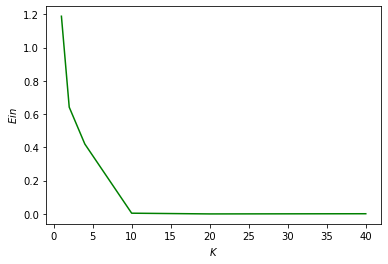

In [38]:
trainx=ccc[:,0]
trainy=ccc[:,1]
eIn2=np.zeros(6)
k=[1,2,4,10,20,40]
LRW2 = [np.zeros(1),np.zeros(2),np.zeros(4),np.zeros(10),np.zeros(20),np.zeros(40)]


#print(datax);
#print(datay);


for i in range(6):
    X=Pol(trainx, k[i])
    #print(X)

    Y=trainy
    w_lr=np.dot(np.dot(np.linalg.inv(np.dot(X.T,X)),X.T),Y)
    LRW2[i]=w_lr
    #print(w_lr);


    b=np.dot(X,w_lr)
    
    #print(b)
    #print(Y)

    eIn2[i]=sum((b-Y)**2)/N

print(eIn2)
#print(LRW2);

fig3=plt.figure()
ax3=plt.axes();

plt.plot(k,eIn2,'g')
ax3.set_xlabel("$K$")
ax3.set_ylabel("$Ein$")


## Perceptron Learning Algorithm (PLA)

In [39]:
filename="test10k.txt"
ddd=np.loadtxt(filename, delimiter=',') 
[N2,dim]=np.shape(ddd)
print(N2,dim)

10000 2


[3.53200160e-01 1.75845509e-01 1.05066194e-01 2.07735069e-03
 2.55767664e-06 3.81269116e-04]


Text(0, 0.5, '$Eout$')

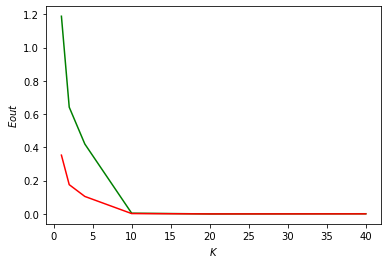

In [40]:
eOut2=np.zeros(6)

for i in range(6):  
    testx=ddd[:,0]
    texty=ddd[:,1]
    


    X=Pol(testx, k[i])
    
    Y=texty
    
    b=np.dot(X,LRW2[i])

    eOut2[i]=sum((b-Y)**2)/N2

print(eOut2)

fig3=plt.figure()
ax3=plt.axes();

plt.plot(k,eIn2,'g')
plt.plot(k,eOut2,'r')
ax3.set_xlabel("$K$")
ax3.set_ylabel("$Eout$")
